In [135]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [136]:
dataset = pd.read_csv('house_data.csv')
dataset.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,price
0,7,1.1,2352,6765,2.0,0,3,5,3743,1940,1900,0,209832
1,4,2.8,4675,11818,1.5,0,1,4,3859,1449,1971,0,1276838
2,5,1.8,3433,2202,2.6,1,0,3,1185,1689,2018,0,142411
3,7,3.3,3784,9135,2.1,1,2,5,2660,491,1986,0,360521
4,3,1.6,4798,6567,1.3,1,0,2,3435,1911,1962,1990,1563529


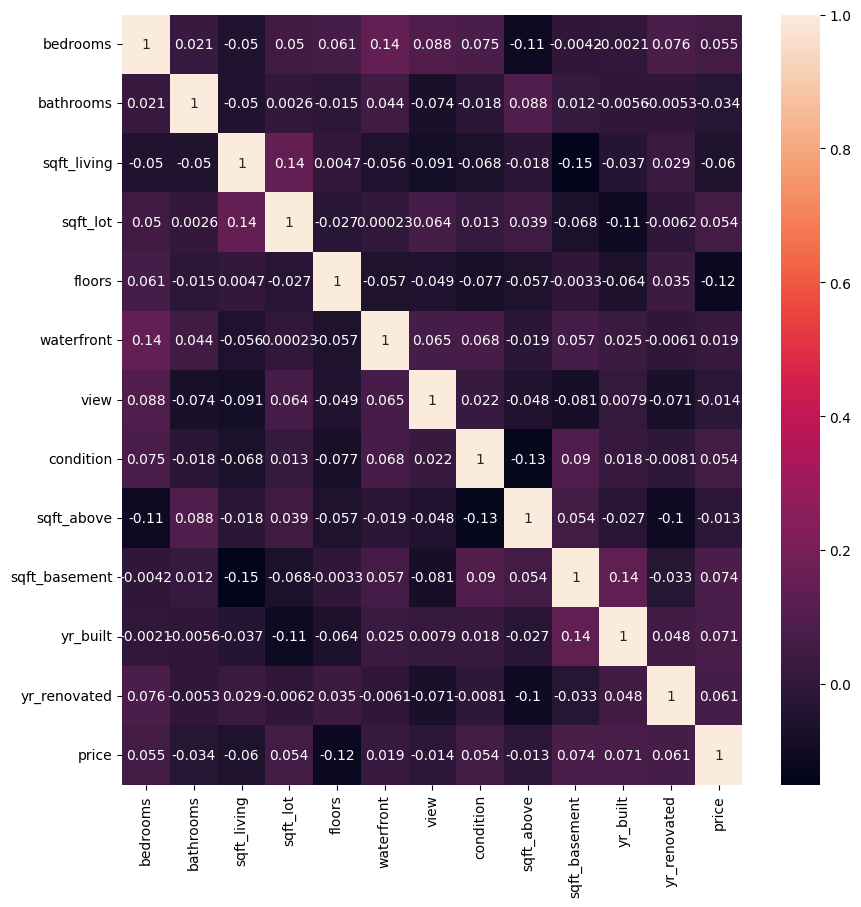

In [137]:
plt.figure(figsize=(10,10))
sns.heatmap(dataset.corr(), annot=True)

plt.show()

In [138]:
x = dataset.iloc[:,:-1]
y = dataset['price']

In [139]:
sc = StandardScaler()
sc.fit(x)
x = pd.DataFrame(sc.transform(x), columns=x.columns)

In [140]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [141]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge

In [142]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
import numpy as np

# linear Regression


In [143]:
lr = LinearRegression()
lr.fit(x_train, y_train)
lr.score(x_test, y_test)*100

0.7177177292437942

In [144]:
print(mean_squared_error(y_test, lr.predict(x_test)))
print(mean_absolute_error(y_test, lr.predict(x_test)))
print(np.sqrt(mean_squared_error(y_test, lr.predict(x_test))))

332663198829.9823
503575.22542403464
576769.6237060186


In [145]:
lr.coef_

array([ 25335.57004005, -11318.91664686, -28858.14643709,  29451.43424889,
       -58095.91759092,   -983.16640978, -55518.45158019,  20707.41953827,
        -1477.82614923,  40882.75269317,  15616.33777636,    721.96143286])

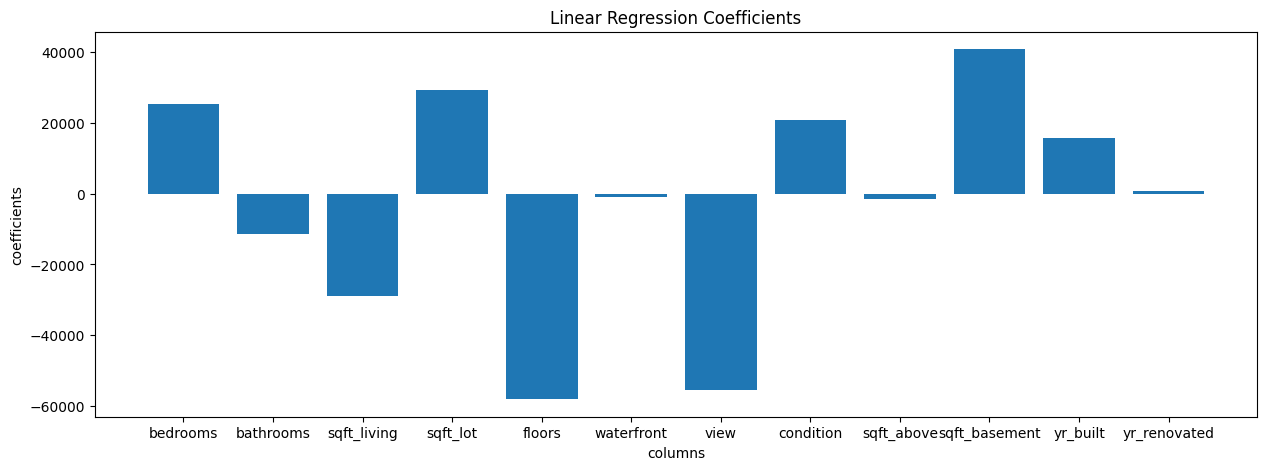

In [146]:
plt.figure(figsize=(15,5))
plt.bar(x.columns, lr.coef_)
plt.title('Linear Regression Coefficients')
plt.xlabel('columns')
plt.ylabel('coefficients')
plt.show()

# Lasso

In [147]:
la = Lasso(alpha=0.05)
la.fit(x_train, y_train)
la.score(x_test, y_test)*100

0.7177123151837161

In [148]:
print(mean_squared_error(y_test, la.predict(x_test)))
print(mean_absolute_error(y_test, la.predict(x_test)))
print(np.sqrt(mean_squared_error(y_test, la.predict(x_test))))

332663216970.7674
503575.2288768378
576769.6394322151


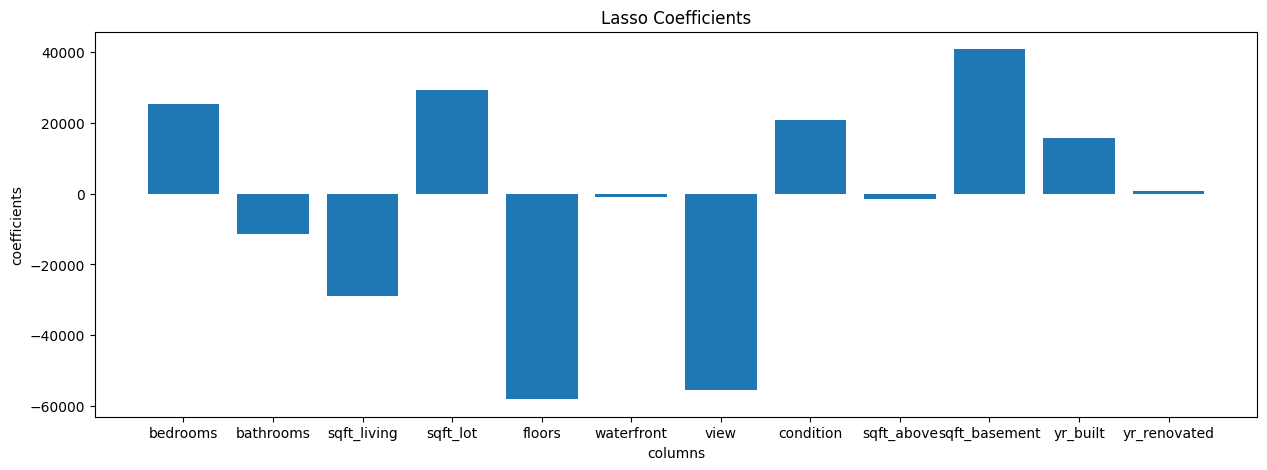

In [149]:
plt.figure(figsize=(15,5))
plt.bar(x.columns, la.coef_)
plt.title('Lasso Coefficients')
plt.xlabel('columns')
plt.ylabel('coefficients')
plt.show()

# Ridge


In [150]:
ri = Ridge(alpha=0.05)
ri.fit(x_train, y_train)
ri.score(x_test, y_test)*100

0.7185648597743066

In [151]:
print(mean_squared_error(y_test, ri.predict(x_test)))
print(mean_absolute_error(y_test, ri.predict(x_test)))
print(np.sqrt(mean_squared_error(y_test, ri.predict(x_test))))

332660360366.30414
503571.77272289334
576767.1630444161


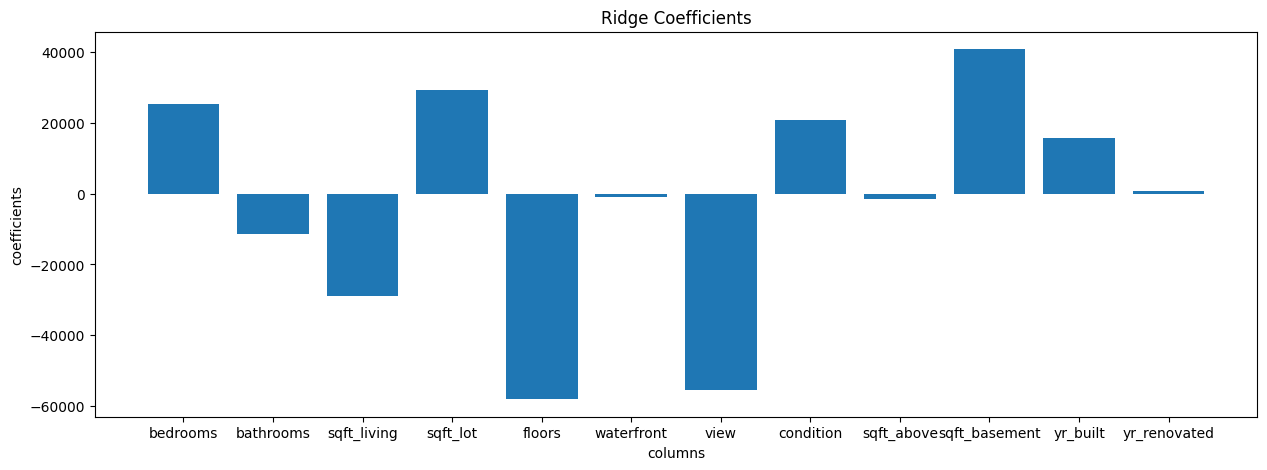

In [152]:
plt.figure(figsize=(15,5))
plt.bar(x.columns, ri.coef_)
plt.title('Ridge Coefficients')
plt.xlabel('columns')
plt.ylabel('coefficients')
plt.show()

In [153]:
df = pd.DataFrame({'col_name': x.columns, 'linear_regression': lr.coef_, 'lasso': la.coef_, 'ridge': ri.coef_})
df

,col_name,linear_regression,lasso,ridge
0,bedrooms,25335.570040,25335.517391,25328.709200
1,bathrooms,-11318.916647,-11318.866095,-11314.709046
2,sqft_living,-28858.146437,-28858.073632,-28849.877878
3,sqft_lot,29451.434249,29451.358808,29441.865958
4,floors,-58095.917591,-58095.857515,-58082.321521
5,waterfront,-983.166410,-983.113421,-982.473617
6,view,-55518.451580,-55518.385395,-55504.369778
7,condition,20707.419538,20707.385249,20705.307530
8,sqft_above,-1477.826149,-1477.774560,-1475.296436
9,sqft_basement,40882.752693,40882.710760,40875.159478
